In [2]:
import os
from os.path import join
import pandas as pd

input_data_dir = os.environ["DATA"] + "/01_space_enumeration/csv_qm/" 

categories = ["Alone", "btx", "naphtalene", "tetracene"]

# Reading data
cat_dataframes = []
for category in categories:
    cat_dataframes.append(pd.read_csv(join(input_data_dir, category + ".csv"), delimiter=";", usecols=range(7)))
    
# Labelling data with input file
for i in range(len(categories)):
    cat_dataframes[i]["from"] = categories[i]
    
# Merging all dataframes
complete_df = pd.concat(cat_dataframes)
complete_df = complete_df[complete_df["pass"] == "PASS"]

cat_dataframes_prefixed = []
# Creating complete dataframe with prefixed properties
for i in range(len(cat_dataframes)):
    curr_df = pd.DataFrame()
    for k in complete_df.keys():
        if k == "id":
            curr_df["id"] = cat_dataframes[i]["id"]
        elif k != "from":
            curr_df[categories[i] + "_" + k] = cat_dataframes[i][k]
            
    if i == 0:
        complete_df_prefixed = curr_df
    else:
        complete_df_prefixed = pd.merge(complete_df_prefixed, curr_df, on="id")
        


## # PASS per category

In [3]:
for category in categories:
    print(category + " : " + str(len(complete_df[complete_df['from'] == category])))

Alone : 12791
btx : 11917
naphtalene : 12826
tetracene : 12795


## Pearson correlations

In [23]:
import numpy as np
from IPython.display import display, HTML
from scipy.stats import pearsonr

properties = ["homo", "lumo", "homo_lumo_gap", "lambda"]

prop_dataframes_dict = {}

for i, prop in enumerate(properties):
    curr_df = pd.DataFrame()
    curr_df["id"] = np.arange(len(complete_df_prefixed["id"]))
    
    # Iterating over keys
    for k in complete_df_prefixed.keys():
        if k.endswith(prop):
            curr_df[k] = complete_df_prefixed[k]
    
    prop_dataframes_dict[prop] = curr_df
    
for k, v in prop_dataframes_dict.items():
    print("Pearson correlation for " + str(k))
    display(HTML(v.corr(method="pearson").to_html()))
    print()
    print()
    print()
    
    
    
for k, v in prop_dataframes_dict.items():
    print("Scipy : Pearson correlation for " + str(k))
    for mol in ["btx", "naphtalene", "tetracene"]:
        alone_data = v["Alone_"+k]
        mol_data = v[mol+"_"+k]
        
        alone_clean = []
        mol_clean = []
        
        for i in range(len(alone_data)):
            if not np.isnan(alone_data[i]) and not np.isnan(mol_data[i]):
                alone_clean.append(alone_data[i])
                mol_clean.append(mol_data[i])
        
        corr, pval = pearsonr(alone_clean, mol_clean)
        print(mol +" " + str(corr) +", " + str(pval))

Pearson correlation for homo





Pearson correlation for lumo





Pearson correlation for homo_lumo_gap





Pearson correlation for lambda





Scipy : Pearson correlation for homo
btx 0.5610756379969888, 0.0
naphtalene 0.7196680647564461, 0.0
tetracene 0.3406840290871908, 0.0
Scipy : Pearson correlation for lumo
btx 0.8010053278154823, 0.0
naphtalene 0.9066745813336861, 0.0
tetracene 0.8472721081827908, 0.0
Scipy : Pearson correlation for homo_lumo_gap
btx 0.6154082984346548, 0.0
naphtalene 0.749516397857502, 0.0
tetracene 0.6418056033983781, 0.0
Scipy : Pearson correlation for lambda
btx 0.42707391742069534, 0.0
naphtalene 0.5383020754993948, 0.0
tetracene 0.3976197782469122, 0.0


## Spearman correlations (rank)

In [24]:
from scipy.stats import spearmanr

for k, v in prop_dataframes_dict.items():
    print("Spearman correlation for " + str(k))
    display(HTML(v.corr(method="spearman").to_html()))
    print()
    print()
    print()
    
for k, v in prop_dataframes_dict.items():
    print("Scipy : Spearman correlation for " + str(k))
    for mol in ["btx", "naphtalene", "tetracene"]:
        alone_data = v["Alone_"+k]
        mol_data = v[mol+"_"+k]
        
        alone_clean = []
        mol_clean = []
        
        for i in range(len(alone_data)):
            if not np.isnan(alone_data[i]) and not np.isnan(mol_data[i]):
                alone_clean.append(alone_data[i])
                mol_clean.append(mol_data[i])
        
        corr, pval = spearmanr(alone_clean, mol_clean)
        print(mol +" " + str(corr) +", " + str(pval))

Spearman correlation for homo





Spearman correlation for lumo





Spearman correlation for homo_lumo_gap





Spearman correlation for lambda





Scipy : Spearman correlation for homo
btx 0.5016112090497394, 0.0
naphtalene 0.69006052294838, 0.0
tetracene 0.32469487856478374, 4.0190912971514466e-302
Scipy : Spearman correlation for lumo
btx 0.8058674512493125, 0.0
naphtalene 0.8991151088254802, 0.0
tetracene 0.8495137338661634, 0.0
Scipy : Spearman correlation for homo_lumo_gap
btx 0.614388460973384, 0.0
naphtalene 0.7362632511381959, 0.0
tetracene 0.6338527437177748, 0.0
Scipy : Spearman correlation for lambda
btx 0.4599810025328888, 0.0
naphtalene 0.5499088152360562, 0.0
tetracene 0.4478279773861543, 0.0


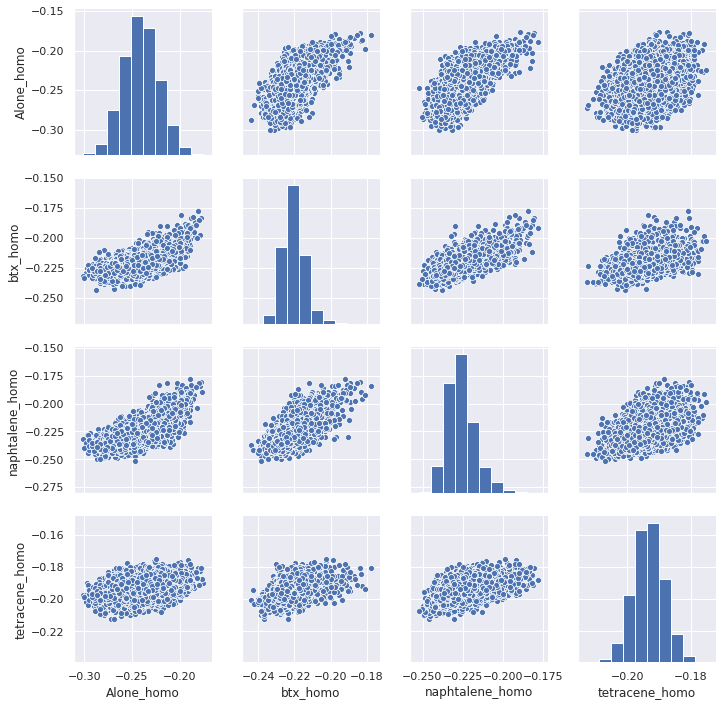

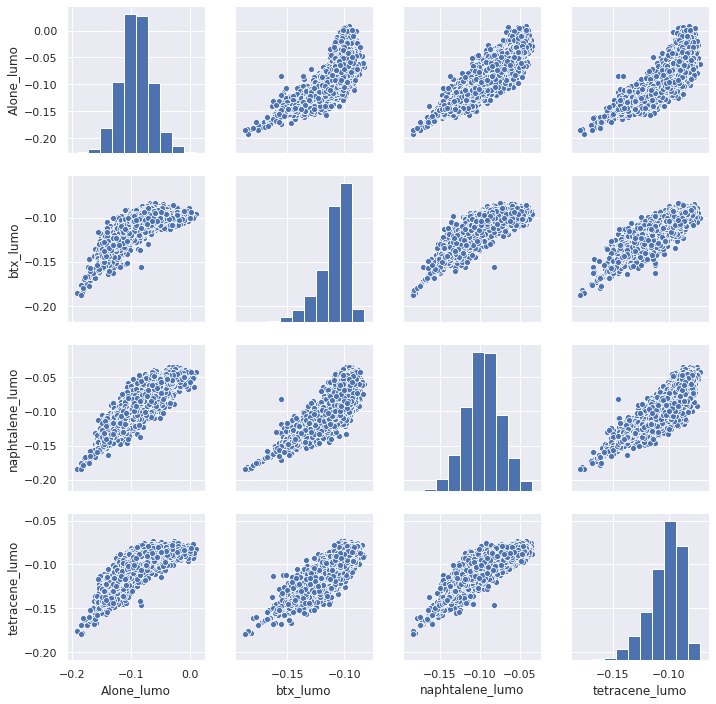

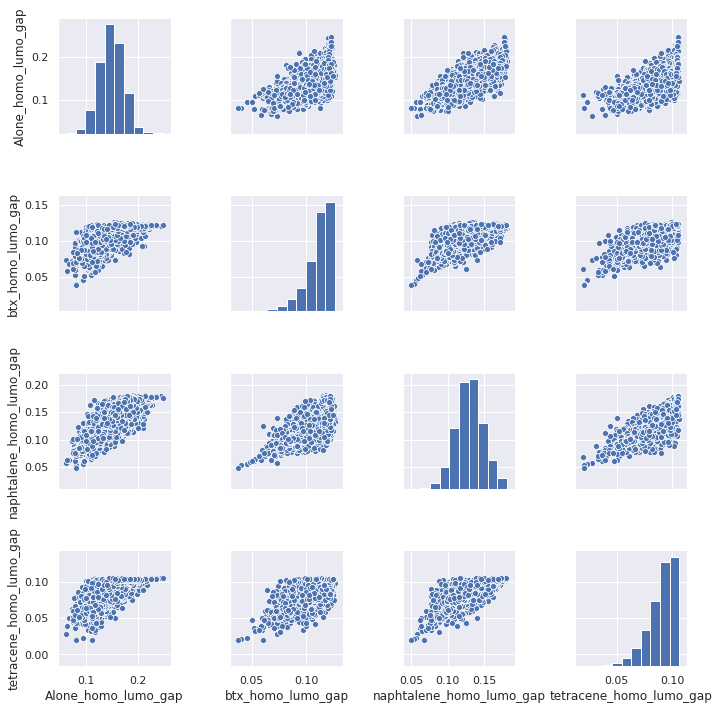

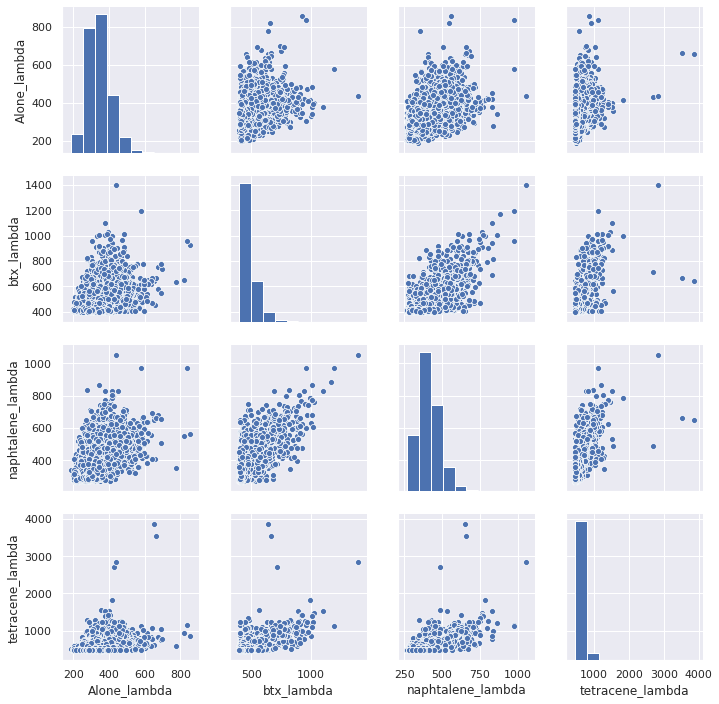

In [14]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

for k, v in prop_dataframes_dict.items():
    sns.pairplot(v.drop(["id"], axis=1))

## Plotting HOMO/LUMO/HOMO-LUMO gap distribution

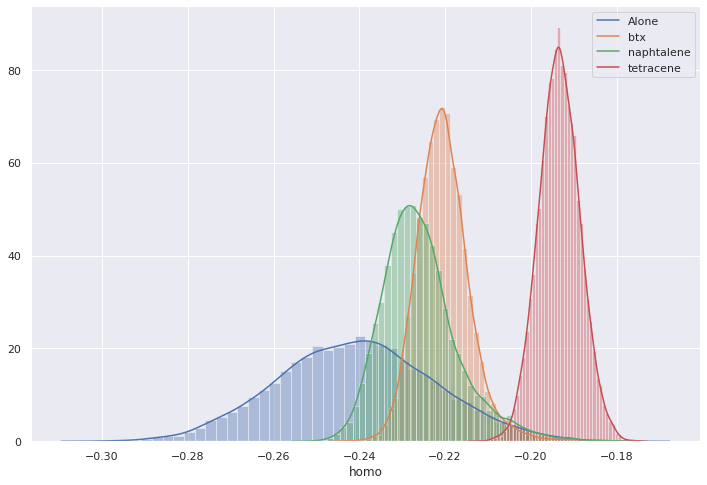

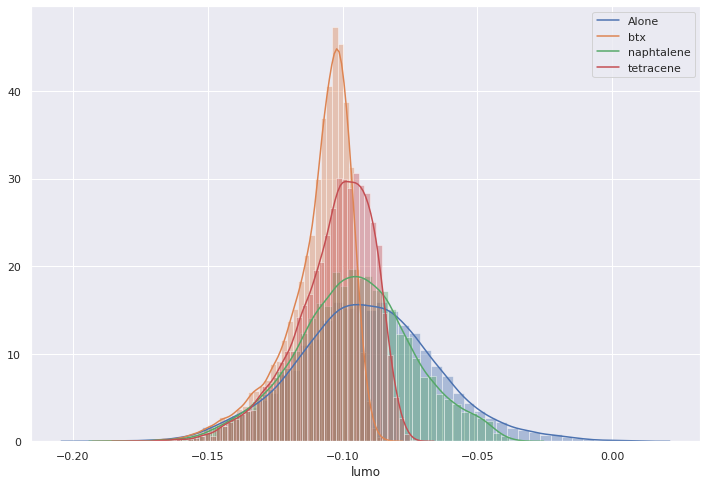

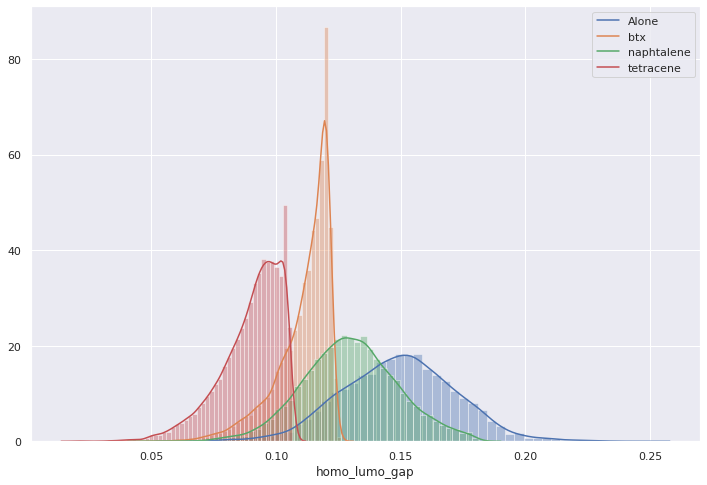

In [26]:
for prop in ["homo", "lumo", "homo_lumo_gap"]:
    plt.figure(figsize=(12, 8))
    for category in categories:
        sns.distplot(complete_df[complete_df["from"] == category][prop], kde_kws={"label":category})
    plt.show()

## Plotting lambda distribution 

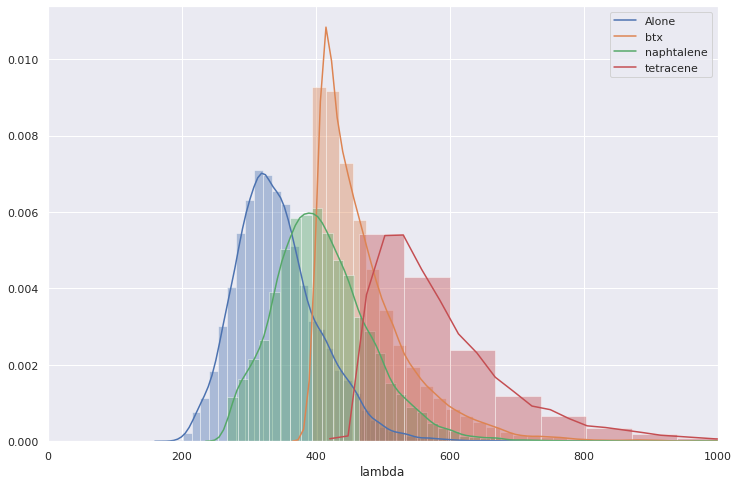

In [25]:

plt.figure(figsize=(12, 8))
plt.xlim(0, 1000)

for category in categories:
    sns.distplot(complete_df[complete_df["from"] == category]["lambda"], kde_kws={"label":category})

## Plotting lambda strength distribution 

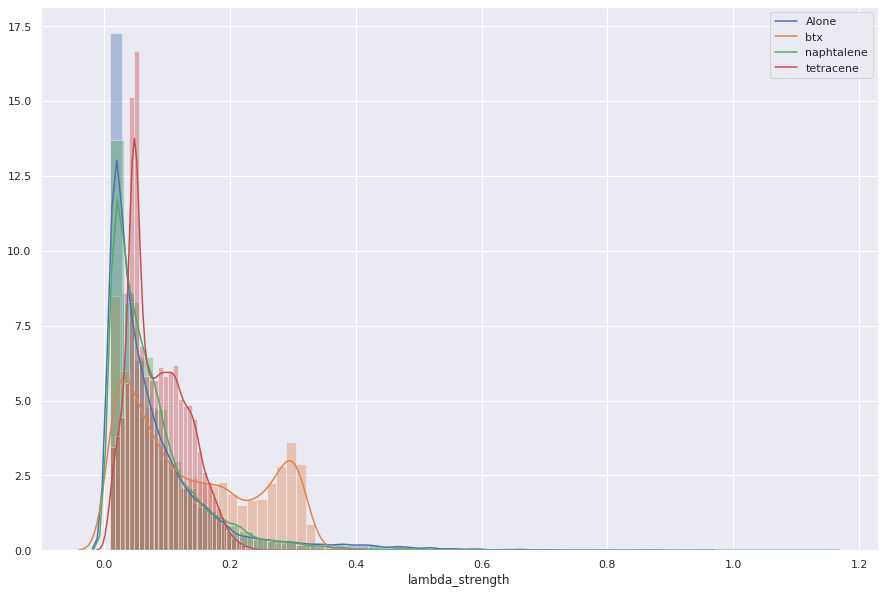

In [8]:
plt.figure(figsize=(15,10))

for category in categories:
    sns.distplot(complete_df[complete_df["from"] == category]["lambda_strength"], kde_kws={"label":category})

## Plotting BTX HOMO/LUMO/GAP vs other molecules

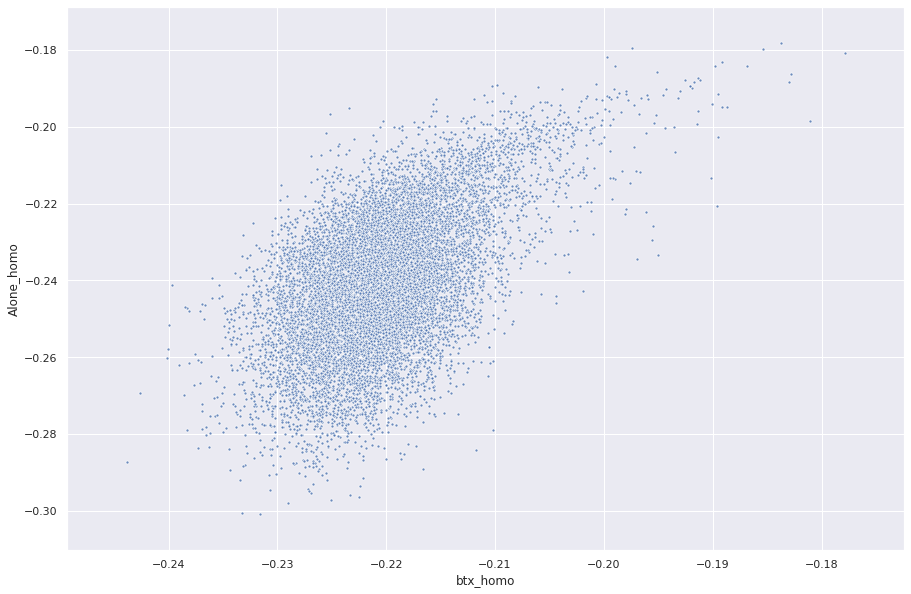

<Figure size 1080x720 with 0 Axes>

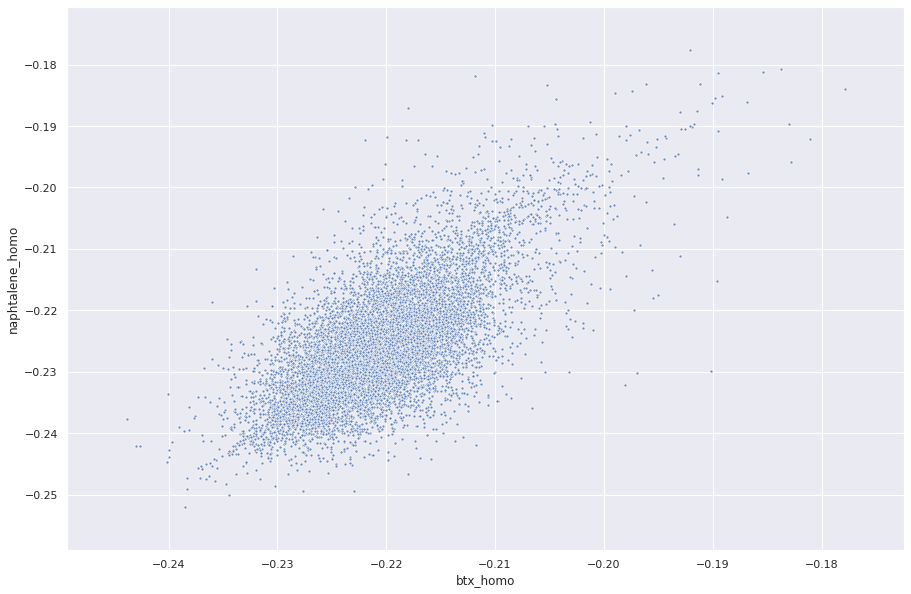

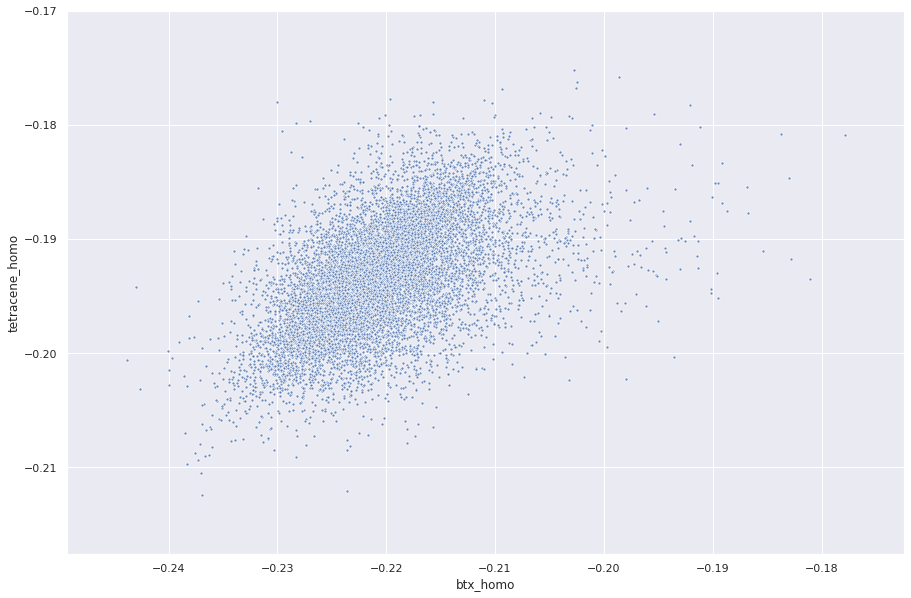

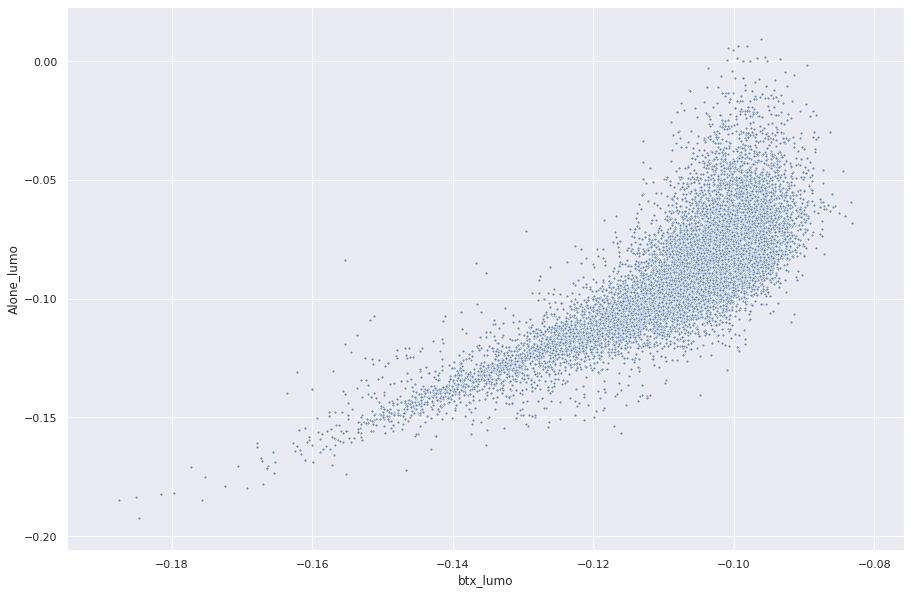

<Figure size 1080x720 with 0 Axes>

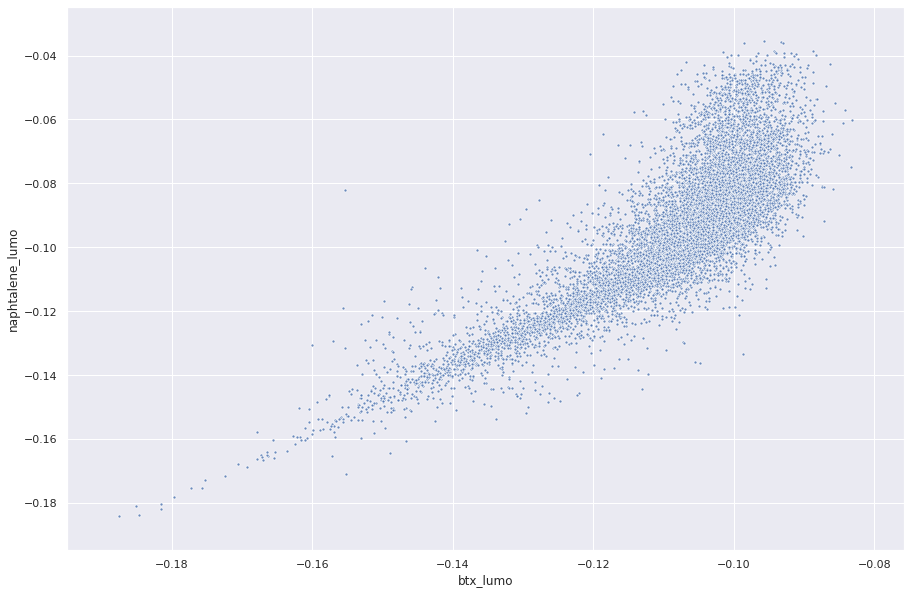

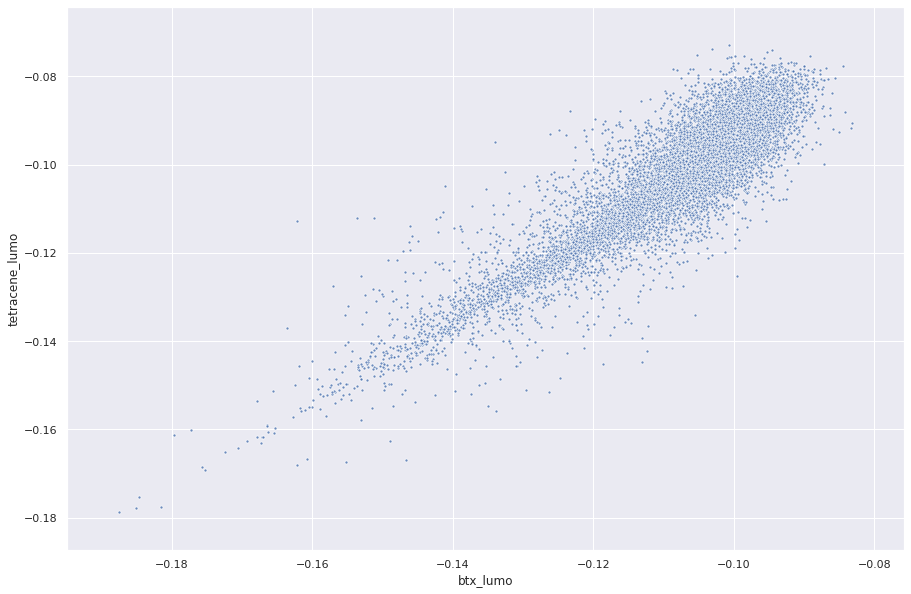

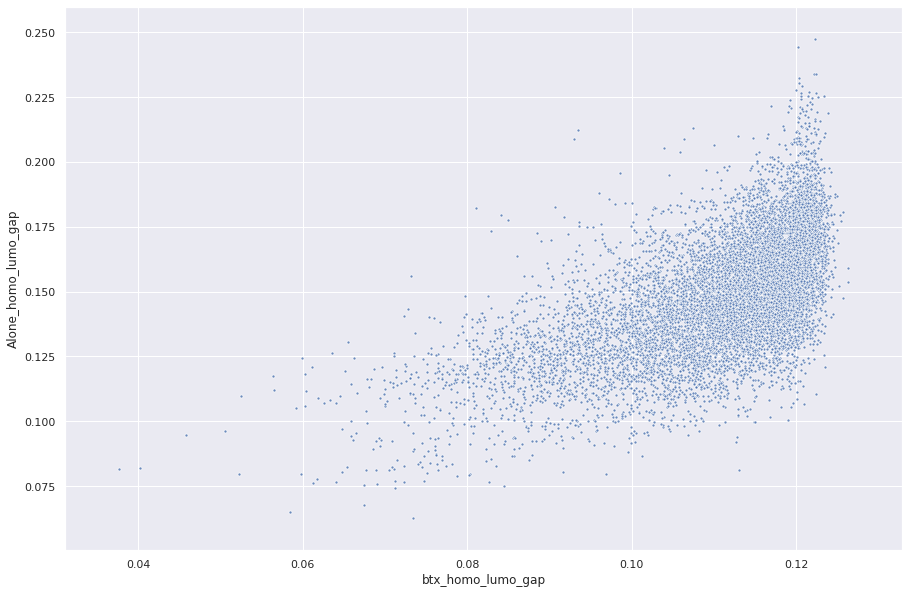

<Figure size 1080x720 with 0 Axes>

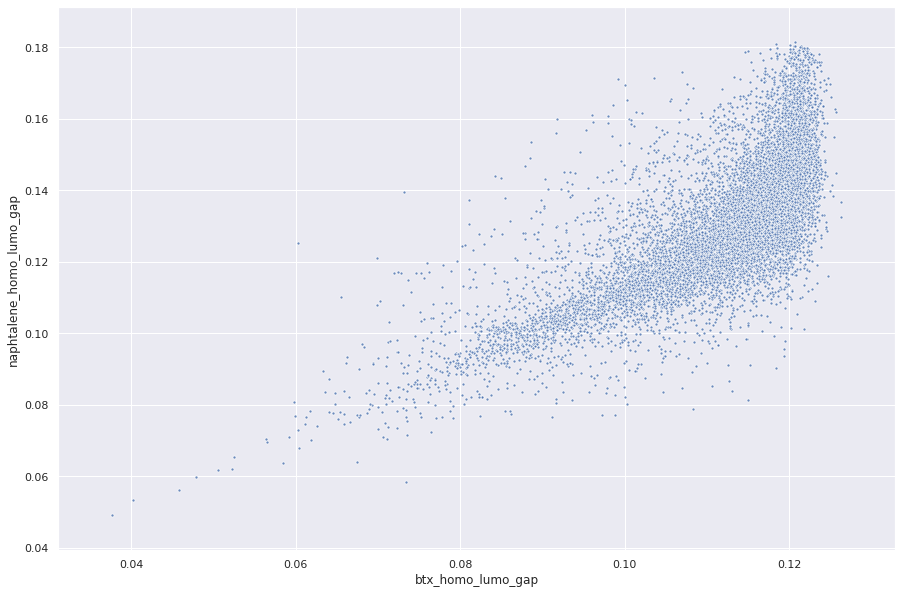

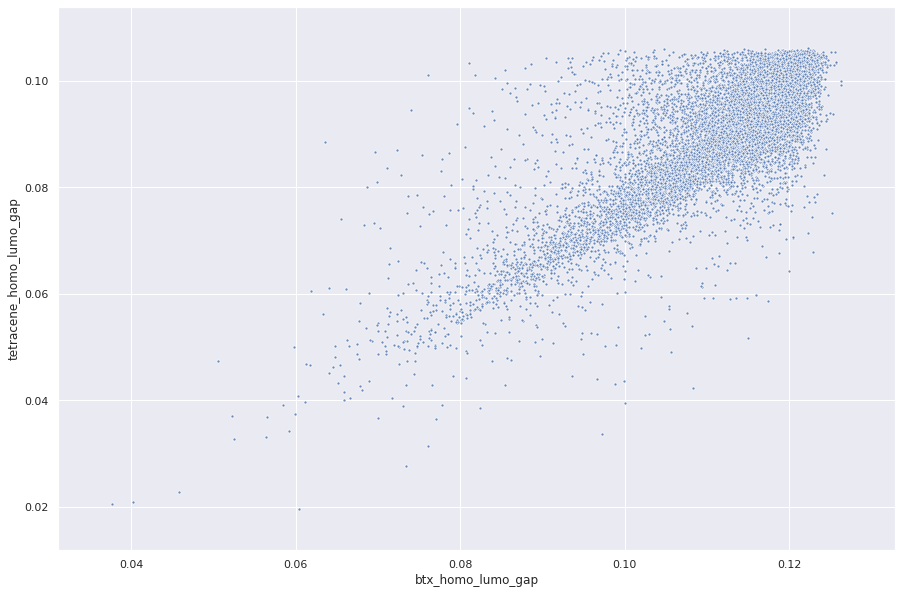

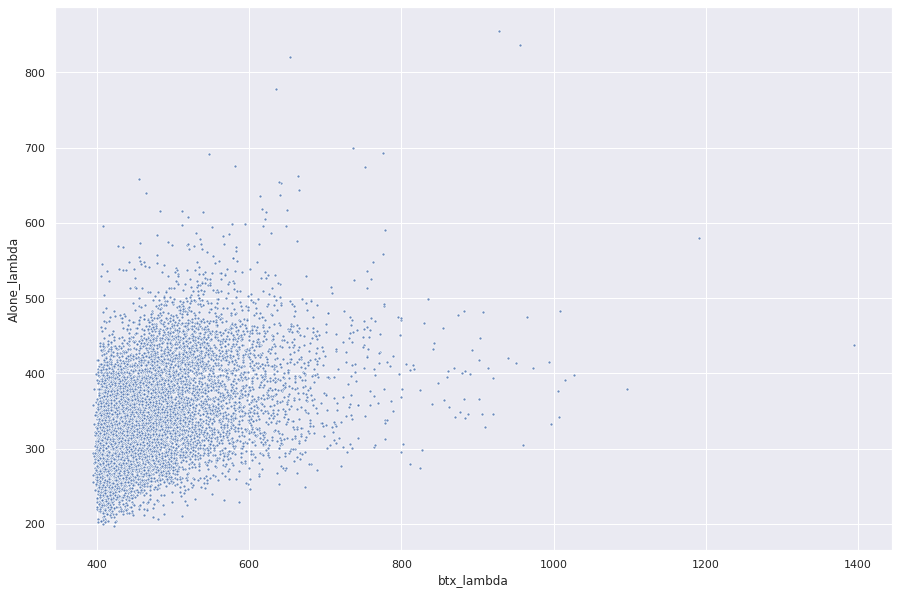

<Figure size 1080x720 with 0 Axes>

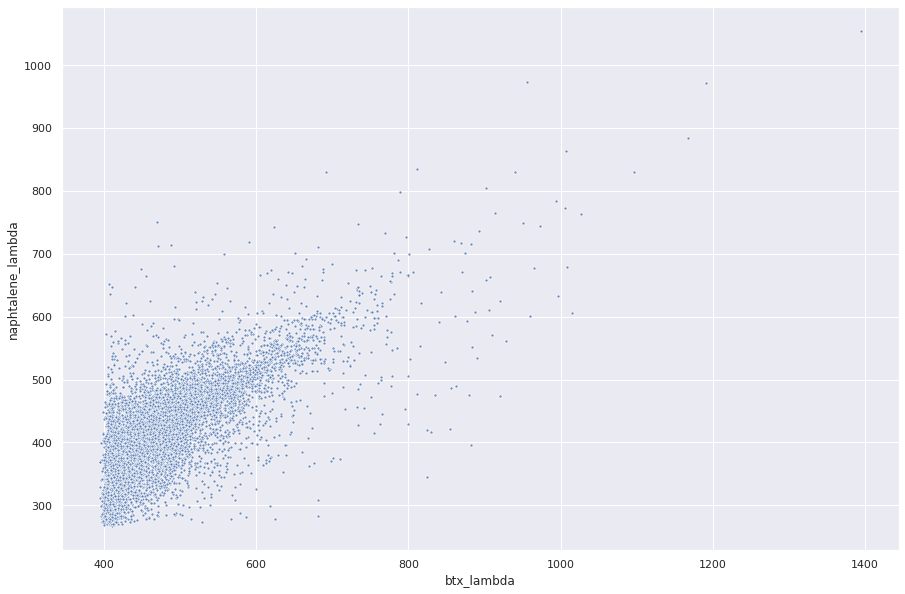

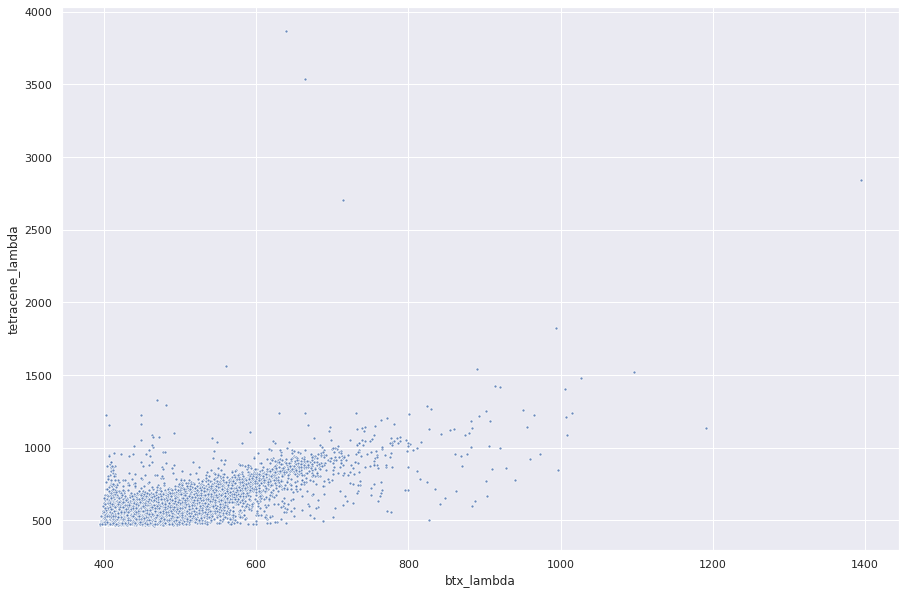

In [9]:


for prop in ["homo", "lumo", "homo_lumo_gap", "lambda"]:
    for category in categories:
        plt.figure(figsize=(15,10))

        if category != "btx":
            sns.scatterplot(x="btx_" + prop, y=category+"_"+prop, data=complete_df_prefixed, marker=".", alpha=0.8)
    
    plt.show()